Nama: Rizal Pangestu

NIM: 21/481585/EK/23658



In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.4 MB/s eta 0:00:00


In [2]:
!python --version

Python 3.10.12


In [ ]:
data = pd.read_csv('/content/tugas3_481585.csv', delimiter=";")

In [ ]:
data.head()

,region,year,pdrb
0,Ogan Komering Ulu,2010,6629.77
1,Ogan Komering Ulu,2011,7007.38
2,Ogan Komering Ulu,2012,7376.01
3,Ogan Komering Ulu,2013,7704.61
4,Ogan Komering Ulu,2014,7987.73


In [ ]:
#Interpolasi data dari tahunan ke kuartalan dengan cubic spline
def interpolate_to_quarterly(df):
    df_quarterly = pd.DataFrame()
    regions = df['region'].unique()

    for region in regions:
        region_data = df[df['region'] == region]
        cs = CubicSpline(region_data['year'], region_data['pdrb'])
        years_quarterly = np.arange(region_data['year'].min(), region_data['year'].max() + 0.25, 0.25)
        interpolated_values = cs(years_quarterly)
        region_df = pd.DataFrame({
            'year_quarter': years_quarterly,
            'region': region,
            'pdrb': interpolated_values
        })
        df_quarterly = pd.concat([df_quarterly, region_df], ignore_index=True)

    return df_quarterly

df_quarterly = interpolate_to_quarterly(data)

In [ ]:
df_quarterly.head()

,year_quarter,region,pdrb
0,2010.00,Ogan Komering Ulu,6629.770000
1,2010.25,Ogan Komering Ulu,6722.804775
2,2010.50,Ogan Komering Ulu,6817.172243
3,2010.75,Ogan Komering Ulu,6912.241089
4,2011.00,Ogan Komering Ulu,7007.380000


In [ ]:
#Membuat variabel logaritma dari pdrb
df_quarterly['log_pdrb'] = np.log(df_quarterly['pdrb'])

In [ ]:
df_quarterly.head()

,year_quarter,region,pdrb,log_pdrb
0,2010.00,Ogan Komering Ulu,6629.770000,8.799325
1,2010.25,Ogan Komering Ulu,6722.804775,8.813261
2,2010.50,Ogan Komering Ulu,6817.172243,8.827200
3,2010.75,Ogan Komering Ulu,6912.241089,8.841049
4,2011.00,Ogan Komering Ulu,7007.380000,8.854719


In [ ]:
#Setting jadi data panel
df_quarterly = df_quarterly.set_index(['region', 'year_quarter'])

In [ ]:
df_quarterly.head()

pdrb  log_pdrb
region            year_quarter                       
Ogan Komering Ulu 2010.00       6629.770000  8.799325
                  2010.25       6722.804775  8.813261
                  2010.50       6817.172243  8.827200
                  2010.75       6912.241089  8.841049
                  2011.00       7007.380000  8.854719

In [ ]:
#Membuat variabel lag pdrb
df_quarterly['lagged_log_pdrb'] = df_quarterly.groupby(level=0)['log_pdrb'].shift(1)

In [ ]:
df_quarterly.head()

pdrb  log_pdrb  lagged_log_pdrb
region            year_quarter                                        
Ogan Komering Ulu 2010.00       6629.770000  8.799325              NaN
                  2010.25       6722.804775  8.813261         8.799325
                  2010.50       6817.172243  8.827200         8.813261
                  2010.75       6912.241089  8.841049         8.827200
                  2011.00       7007.380000  8.854719         8.841049

In [ ]:
#Membuat variabel pertumbuhan dari pdrb
df_quarterly['growth_rate'] = df_quarterly['log_pdrb'] - df_quarterly['lagged_log_pdrb']

In [ ]:
df_quarterly.head()

pdrb  log_pdrb  lagged_log_pdrb  \
region            year_quarter                                           
Ogan Komering Ulu 2010.00       6629.770000  8.799325              NaN   
                  2010.25       6722.804775  8.813261         8.799325   
                  2010.50       6817.172243  8.827200         8.813261   
                  2010.75       6912.241089  8.841049         8.827200   
                  2011.00       7007.380000  8.854719         8.841049   

                                growth_rate  
region            year_quarter               
Ogan Komering Ulu 2010.00               NaN  
                  2010.25          0.013935  
                  2010.50          0.013939  
                  2010.75          0.013849  
                  2011.00          0.013670

In [ ]:
all_data = df_quarterly

In [ ]:
# Membagi Data ke dalam Subset 1 dan Subset 2
subset_1 = df_quarterly.loc[(df_quarterly.index.get_level_values('year_quarter') >= 2010) &
                            (df_quarterly.index.get_level_values('year_quarter') < 2020)]
subset_2 = df_quarterly.loc[(df_quarterly.index.get_level_values('year_quarter') >= 2020) &
                            (df_quarterly.index.get_level_values('year_quarter') <= 2023.75)]

In [ ]:
subset_1.head()

pdrb  log_pdrb  lagged_log_pdrb  \
region            year_quarter                                           
Ogan Komering Ulu 2010.00       6629.770000  8.799325              NaN   
                  2010.25       6722.804775  8.813261         8.799325   
                  2010.50       6817.172243  8.827200         8.813261   
                  2010.75       6912.241089  8.841049         8.827200   
                  2011.00       7007.380000  8.854719         8.841049   

                                growth_rate  
region            year_quarter               
Ogan Komering Ulu 2010.00               NaN  
                  2010.25          0.013935  
                  2010.50          0.013939  
                  2010.75          0.013849  
                  2011.00          0.013670

In [ ]:
subset_1.describe()

,pdrb,log_pdrb,lagged_log_pdrb,growth_rate
count,680.000000,680.000000,663.000000,663.000000
mean,15079.625801,9.059602,9.054251,0.011904
std,20063.489945,0.991389,0.990917,0.005416
min,1465.240000,7.289774,7.289774,-0.002730
25%,4066.224216,8.310469,8.304720,0.009927
50%,7485.103261,8.920670,8.917602,0.012495
75%,15348.658345,9.638783,9.633298,0.015008
max,104501.864882,11.556960,11.556960,0.035366


In [ ]:
subset_2.head()

pdrb  log_pdrb  lagged_log_pdrb  \
region            year_quarter                                            
Ogan Komering Ulu 2020.00        9866.720000  9.196923         9.197984   
                  2020.25        9885.820444  9.198857         9.196923   
                  2020.50        9935.946985  9.203914         9.198857   
                  2020.75       10013.920034  9.211731         9.203914   
                  2021.00       10116.560000  9.221929         9.211731   

                                growth_rate  
region            year_quarter               
Ogan Komering Ulu 2020.00         -0.001061  
                  2020.25          0.001934  
                  2020.50          0.005058  
                  2020.75          0.007817  
                  2021.00          0.010198

In [ ]:
subset_2.describe()

,pdrb,log_pdrb,lagged_log_pdrb,growth_rate
count,221.000000,221.000000,221.000000,221.000000
mean,19838.352710,9.331387,9.320957,0.010429
std,26269.025112,0.994442,0.993548,0.004441
min,2234.270000,7.711670,7.709806,-0.001061
25%,5481.637708,8.609159,8.599878,0.009320
50%,10149.092220,9.225140,9.218411,0.011105
75%,20905.990000,9.947791,9.936420,0.012520
max,118587.140000,11.683403,11.671739,0.020994


In [ ]:
# Fungsi untuk menghitung Beta Convergence
def beta_convergence(data, label):
    model_beta = PanelOLS.from_formula('growth_rate ~ 1 + lagged_log_pdrb + EntityEffects', data=data)
    result_beta = model_beta.fit()
    print(f"\nBeta Convergence - {label}")
    print(result_beta.summary)

    beta = result_beta.params['lagged_log_pdrb']
    if beta < 0:
        print(f"Hasil menunjukkan adanya konvergensi (catching up) antar wilayah untuk {label}.")
    else:
        print(f"Hasil menunjukkan tidak adanya konvergensi atau bahkan divergensi antar wilayah untuk {label}.")
    return beta

In [ ]:
# Menampilkan Hasil Beta Convergence untuk Subset 1 (2010Q1 - 2019Q4)
beta_1 = beta_convergence(subset_1, "Subset 1 (2010Q1 - 2019Q4)")


Beta Convergence - Subset 1 (2010Q1 - 2019Q4)
                          PanelOLS Estimation Summary                           
Dep. Variable:            growth_rate   R-squared:                        0.1877
Estimator:                   PanelOLS   R-squared (Between):             -59.073
No. Observations:                 663   R-squared (Within):               0.1877
Date:                Sun, Oct 27 2024   R-squared (Overall):             -7.8004
Time:                        18:53:46   Log-likelihood                    2636.4
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      149.03
Entities:                          17   P-value                           0.0000
Avg Obs:                       39.000   Distribution:                   F(1,645)
Min Obs:                       39.000                                           
Max Obs:                       39.000   F-statistic (robust): 

/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [ ]:
# Menampilkan Hasil Beta Convergence untuk Subset 2 (2020Q1 - 2023Q4)
beta_2 = beta_convergence(subset_2, "Subset 2 (2020Q1 - 2023Q4)")


Beta Convergence - Subset 2 (2020Q1 - 2023Q4)
                          PanelOLS Estimation Summary                           
Dep. Variable:            growth_rate   R-squared:                        0.3605
Estimator:                   PanelOLS   R-squared (Between):             -541.68
No. Observations:                 221   R-squared (Within):               0.3605
Date:                Sun, Oct 27 2024   R-squared (Overall):             -138.10
Time:                        18:53:49   Log-likelihood                    966.07
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      114.45
Entities:                          17   P-value                           0.0000
Avg Obs:                       13.000   Distribution:                   F(1,203)
Min Obs:                       13.000                                           
Max Obs:                       13.000   F-statistic (robust): 

In [ ]:
# Fungsi untuk menghitung sigma-convergence
def calculate_sigma_convergence(data):
    """
    Menghitung variansi log PDRB per kapita untuk setiap kuartal dalam data.

    Parameters:
    - data: DataFrame yang berisi data kuartalan dengan kolom 'year_quarter' dan 'log_pdrb'.

    Returns:
    - DataFrame dengan kolom 'quarter' dan 'sigma_convergence' yang berisi variansi log PDRB per kuartal.
    """
    # Menghitung variansi log PDRB per kapita untuk setiap kuartal
    sigma_data = data.groupby('year_quarter')['log_pdrb'].var().reset_index()
    sigma_data.columns = ['quarter', 'sigma_convergence']
    return sigma_data


In [ ]:
#Fungsi untuk menampilkan grafik sigma-convergence
def plot_sigma_convergence(sigma_data, title="Sigma Convergence"):
    """
    Memplot sigma-convergence untuk data secara umum atau subset tertentu.

    Parameters:
    - sigma_data: DataFrame yang berisi kolom 'quarter' dan 'sigma_convergence'.
    - title: Judul plot, default "Sigma Convergence".
    """
    plt.figure(figsize=(10, 6))
    plt.plot(sigma_data['quarter'], sigma_data['sigma_convergence'], linestyle='-', color='b')
    plt.title(title)
    plt.xlabel("Quarter")
    plt.ylabel("Variance of Log PDRB")
    plt.xticks(rotation=45)  # Rotasi label x agar lebih mudah dibaca
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
sigma_subset_1 = calculate_sigma_convergence(subset_1)
print("Sigma Convergence for Subset 1 (2010Q1 - 2019Q4):")
print(sigma_subset_1)

Sigma Convergence for Subset 1 (2010Q1 - 2019Q4):
    quarter  sigma_convergence
0   2010.00           1.004570
1   2010.25           1.006792
2   2010.50           1.008694
3   2010.75           1.010376
4   2011.00           1.011937
5   2011.25           1.013464
6   2011.50           1.015029
7   2011.75           1.016690
8   2012.00           1.018501
9   2012.25           1.020440
10  2012.50           1.022135
11  2012.75           1.023100
12  2013.00           1.022852
13  2013.25           1.021219
14  2013.50           1.018965
15  2013.75           1.016941
16  2014.00           1.015812
17  2014.25           1.015911
18  2014.50           1.016802
19  2014.75           1.017933
20  2015.00           1.018783
21  2015.25           1.018991
22  2015.50           1.018765
23  2015.75           1.018440
24  2016.00           1.018323
25  2016.25           1.018639
26  2016.50           1.019348
27  2016.75           1.020349
28  2017.00           1.021544
29  2017.25         

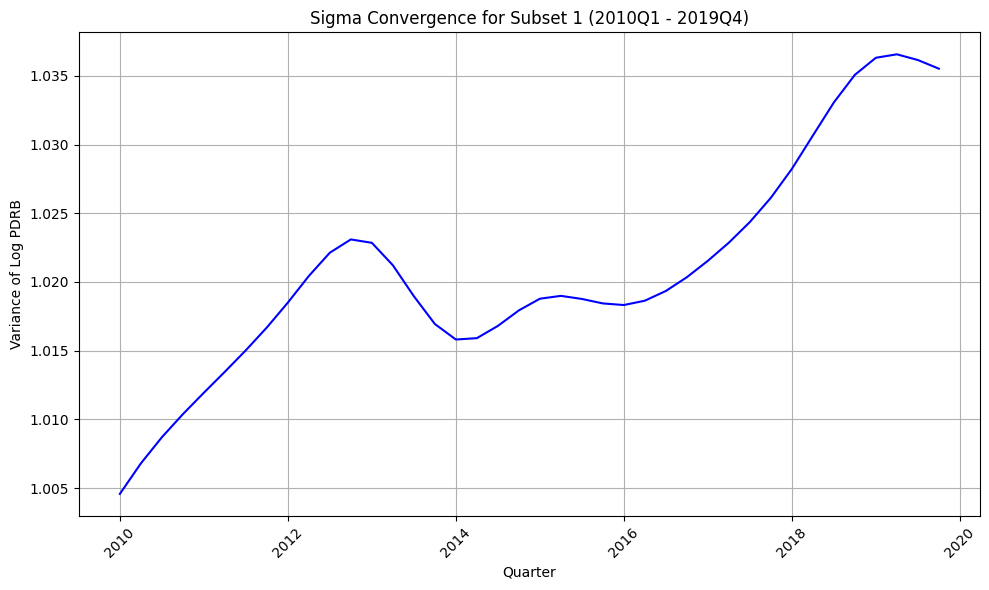

In [ ]:
plot_sigma_convergence(sigma_subset_1, "Sigma Convergence for Subset 1 (2010Q1 - 2019Q4)")

In [ ]:
sigma_subset_2 = calculate_sigma_convergence(subset_2)
print("\nSigma Convergence for Subset 2 (2020Q1 - 2023Q4):")
print(sigma_subset_2)


Sigma Convergence for Subset 2 (2020Q1 - 2023Q4):
    quarter  sigma_convergence
0   2020.00           1.035146
1   2020.25           1.035374
2   2020.50           1.036184
3   2020.75           1.037439
4   2021.00           1.038994
5   2021.25           1.040732
6   2021.50           1.042623
7   2021.75           1.044665
8   2022.00           1.046857
9   2022.25           1.049198
10  2022.50           1.051689
11  2022.75           1.054331
12  2023.00           1.057127


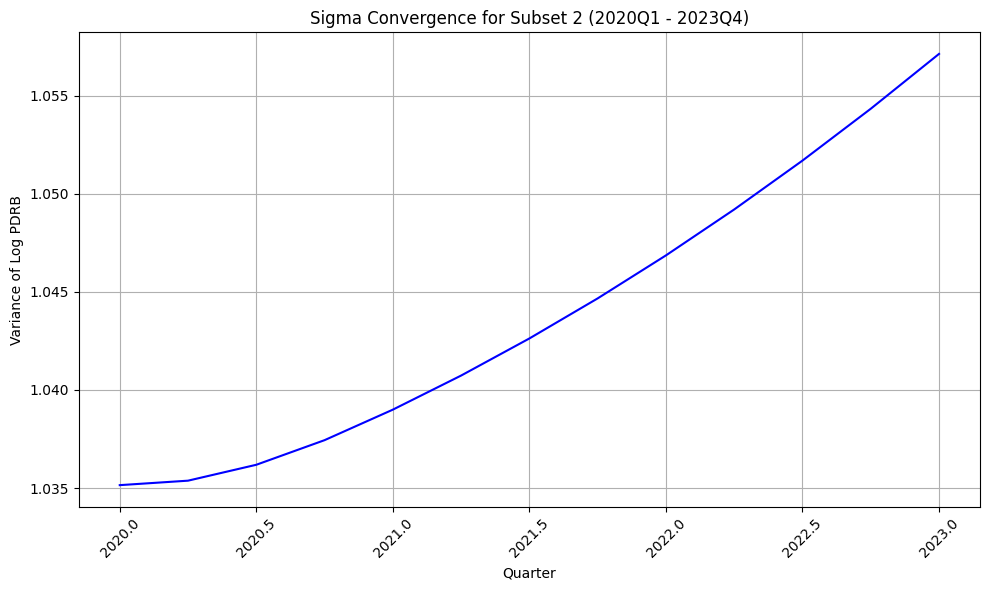

In [ ]:
plot_sigma_convergence(sigma_subset_2, "Sigma Convergence for Subset 2 (2020Q1 - 2023Q4)")

In [ ]:
sigma_data_general = calculate_sigma_convergence(df_quarterly)
print("Sigma Convergence for All Data:")
print(sigma_data_general)

Sigma Convergence for All Data:
    quarter  sigma_convergence
0   2010.00           1.004570
1   2010.25           1.006792
2   2010.50           1.008694
3   2010.75           1.010376
4   2011.00           1.011937
5   2011.25           1.013464
6   2011.50           1.015029
7   2011.75           1.016690
8   2012.00           1.018501
9   2012.25           1.020440
10  2012.50           1.022135
11  2012.75           1.023100
12  2013.00           1.022852
13  2013.25           1.021219
14  2013.50           1.018965
15  2013.75           1.016941
16  2014.00           1.015812
17  2014.25           1.015911
18  2014.50           1.016802
19  2014.75           1.017933
20  2015.00           1.018783
21  2015.25           1.018991
22  2015.50           1.018765
23  2015.75           1.018440
24  2016.00           1.018323
25  2016.25           1.018639
26  2016.50           1.019348
27  2016.75           1.020349
28  2017.00           1.021544
29  2017.25           1.022865
30  201

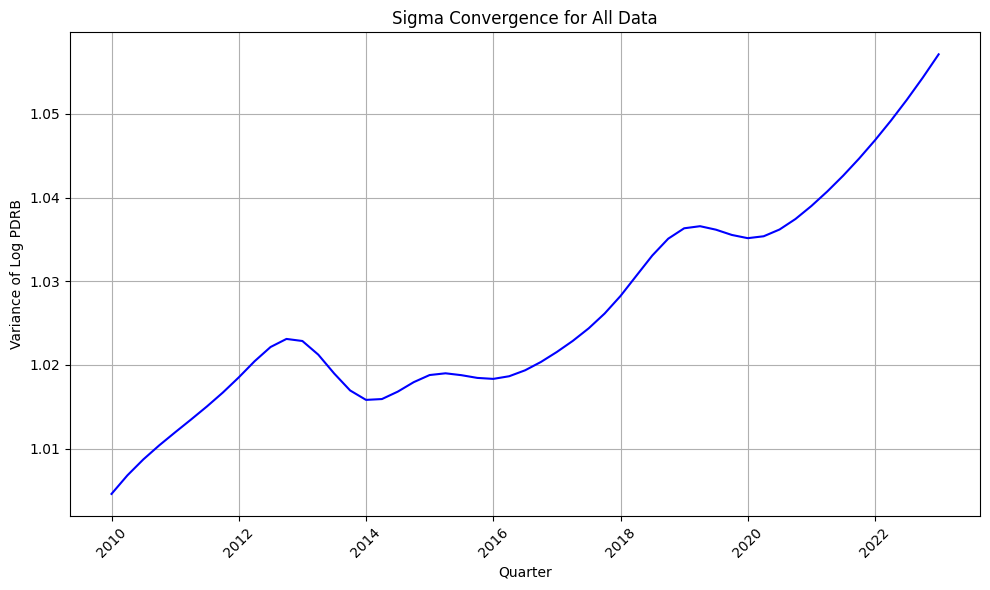

In [ ]:
plot_sigma_convergence(sigma_data_general, "Sigma Convergence for All Data")